<img src='https://data.inpe.br/wp-content/uploads/2025/06/big-1.svg' align='right' width='100px'/>

# <span style="color:#336699;">Geração e Visualização de uma Composição True Color Utilizando Imagens do Satélite GOES</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: center;font-size: 90%;">
    Katiusca Briones Estébanez, Douglas Uba<br/><br/>
    Programa BIG - Base de Informações Georreferenciadas do INPE<br/>
    DISSM -  Divisão de Satélites e Sensores Meteorológicos.
    <br/>
    CGCT - Coordenação-Geral de Ciências da Terra.
    <br/>
    INPE - Instituto Nacional de Pesquisas Espaciais, Brasil.
    <br/>
    Contato: <a href="mailto:douglas.uba@inpe.br">douglas.uba@inpe.br</a>
    <br/><br/>
    Última Atualização: 05 de fevereiro de 2026.
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Resumo</b> Este notebook apresenta um exemplo de geração e visualização de uma composição True Color a partir de imagens do satélite GOES, recuperadas via padrão STAC a partir do Catálogo Integrado do INPE. O estudo de caso considera dados do dia 11 de dezembro de 2025, quando ocorreu a formação de um ciclone extratropical que afetou o Estado de São Paulo. O evento foi caracterizado por ventos de aproximadamente 100 km/h, resultando em queda de árvores e interrupções no fornecimento de energia para aproximadamente dois milhões de moradores da Região Metropolitana de São Paulo - SP.
</div>

## 📚 Coleções GOES na BIG
<hr style="border:1px solid #0077b9;">

Atualmente, `3 Collections` de imagens **GOES** estão disponíveis no **Catálago Integrado de Imagens da BIG**, acessível em https://data.inpe.br/stac/browser/.
- [🌐 GOES13-L3-IMAGER](https://data.inpe.br/stac/browser/collections/GOES13-L3-IMAGER-1): possui imagens do satélite GOES-13 que foram adquiridas no período de 25/11/2011 - 03:00 PM UTC até 08/01/2018 - 03:00 PM UTC.
- [🌐 GOES16-L2-CMI](https://data.inpe.br/stac/browser/collections/GOES16-L2-CMI-1): possui imagens do satélite GOES-16 que foram adquiridas desde 26/04/2017 - 12:45 PM UTC até 07/04/2025 - 06:30 PM UTC. Como este satélite está operacional, o processo de catalogação acontece para cada novo conjunto de imagens recebidas, mantendo o catálogo sempre atualizado com as informações mais recentemente disponíveis.
- [🌐 GOES19-L2-CMI](https://data.inpe.br/stac/browser/collections/GOES19-L2-CMI-1): possui imagens do satélite GOES-19 que foram adquiridas desde 02/04/2025 - 12:00 PM UTC até o presente. Como este satélite está operacional, o processo de catalogação acontece para cada novo conjunto de imagens recebidas, mantendo o catálogo sempre atualizado com as informações mais recentemente disponíveis.


<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Nota:</b> Importante informar que podem haver arquivos faltantes, devido a falhas do satélite, ou na transmissão, recepção, processamento ou armazenamento dos dados.
</div>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Nota:</b> Para a coleção GOES16-L2-CMI, a catalogação das imagens antes do ano de 2019 está em processamento.
</div>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Nota:</b> Para ambas as coleções, optou-se por estabelecer cada observação (<i>i.e.</i> scan) do satélite geoestacionário como um Item específico.
</div><br>

👉 Para o caso de estudo, vamos explorar a coleção **GOES-19**, satélite que estava operacional no período de interesse.

## 🛰️ GOES/ABI - Canais Espectrais

A tabela abaixo apresenta as características principais do imageador ABI (*Advanced Baseline Imager*) que integra os satélites da Série GOES-R.

| Canal | Comprimento de Onda (μm) | Nome Comum | Principais Aplicações | Resolução Espacial (km) |
|-------|--------------------------|------------|----------------------|-------------------------|
| **01** | **0.47** | **Azul (Blue)** | **Detecção de aerossóis, qualidade do ar, vegetação** | **1** |
| **02** | **0.64** | **Vermelho (Red)** | **Mapeamento de nuvens, limites terrestres, vegetação** | **0.5** |
| **03** | **0.86** | **Próximo ao Infravermelho (Near-IR)** | **Detecção de neve/gelo, características da superfície terrestre** | **1** |
| 04 | 1.37 | Cirrus | Detecção de nuvens cirrus, vapor de água na alta atmosfera | 2 |
| 05 | 1.6 | Infravermelho Próximo (Near-IR) | Distinguir gelo e água em nuvens, propriedades de nuvens | 1 |
| 06 | 2.2 | Infravermelho de Ondas Curtas (SWIR) | Detecção de umidade de vegetação, características do solo | 2 |
| 07 | 3.9 | Infravermelho de Ondas Curtas (SWIR) | Detecção de focos de calor, queimadas | 2|
| 08 | 6.2 | Vapor de Água | Umidade atmosférica, movimento de sistemas meteorológicos | 2 |
| 09 | 7.3 | Vapor de Água | Umidade atmosférica em diferentes altitudes | 2 |
| 10 | 7.6 | Vapor de Água | Movimentos de massas de ar, sistemas meteorológicos | 2 |
| 11 | 8.4 | Infravermelho (IR) | Temperatura do topo das nuvens, identificação de sistemas | 2 |
| 12 | 9.7 | Infravermelho (IR) | Temperatura atmosférica, identificação de sistemas | 2 |
| 13 | 10.3 | Infravermelho (IR) | Temperatura do topo das nuvens, identificação de sistemas | 2 |
| 14 | 11.2 | Infravermelho (IR) | Temperatura da superfície terrestre e marítima | 2 |
| 15 | 12.3 | Infravermelho (IR) | Temperatura atmosférica, características de nuvens | 2 |
| 16 | 13.3 | Infravermelho (IR) | Alturas de nuvens, temperatura atmosférica | 2 |

👉 Neste notebook, vamos manipular as imagens das bandas 1 (azul), 2 (vermelho) e 3 (infravermelho-próximo) para gerar e visualizar uma composição True Color.

### Observações

- Os canais 1-6 são no espectro visível e infravermelho próximo
- Os canais 7-16 são no espectro infravermelho
- Resolução espacial varia de 0.5 a 2 km na cobertura da série GOES-R
- Cada canal tem características específicas para diferentes análises atmosféricas e terrestres
- Fonte: [GOES-R - ABI Bands Quick Information Guides](https://www.goes-r.gov/mission/ABI-bands-quick-info.html)

## 👩🏽‍💻 STAC Client API
<hr style="border:1px solid #0077b9;">

Para execução dos exemplos deste Jupyter Notebook, será instalado o pacote [pystac-client](https://pystac-client.readthedocs.io/en/latest/).

In [1]:
# Não necessário no ambiente do BDC-Lab
#!pip install pystac-client

Para acessar as funcionalidades, importa-se o pacote `pystac_client`:

In [2]:
import pystac_client
pystac_client.__version__

'0.8.5'

Em seguida, realiza-se a conexão com o serviço STAC do INPE:

In [3]:
service = pystac_client.Client.open(
    'https://data.inpe.br/bdc/stac/v1/'
)
service

<Client id=INPE>

## 🔍 Recuperando Imagens do dia 11/12/2025 - 13:10h UTC
<hr style="border:1px solid #0077b9;">

Utilizando o serviço STAC, partir do método `search`, faremos a recuperação de `Items` da coleção `GOES19-L2-CMI-1`. Vamos utilizar o parâmetro `datetime` para **selecionar a data e hora de interesse**: `2025-12-11 13:10 UTC`, dia em que o ciclone extratropical estava na sua maior intensidade.

In [4]:
item_search = service.search(
    collections=['GOES19-L2-CMI-1'],
    datetime='2025-12-11T13:10:00', # <== desired date
)

Na sequência, construímos uma lista com o item que foi recuperado, assim podemos associá-lo à variável `item`:

In [5]:
item = list(item_search.items())[0]

Para o `Item`, temos as imagens (`Asset`) de interesse (`B01`, `B02` e `B03`), que usaremos para construir a imagem True Color.

In [6]:
item

<Item id=GOES19_L2_ABI_202512111310>

As imagens do GOES-R são fornecidas no formato [**Network Common Data Form (NetCDF)**](https://www.unidata.ucar.edu/software/netcdf/), amplamente utilizado para armazenar dados científicos multidimensionais, como variáveis climáticas e ambientais. Sendo assim, utilizaremos a biblioteca `netCDF4` para ler as informações das imagens.

In [7]:
b01_file = item.assets['B01'].href
b02_file = item.assets['B02'].href
b03_file = item.assets['B03'].href
b01_file, b02_file, b03_file

('https://data.inpe.br/bdc/data/GOES19-L2-CMI/ch01/2025/12/S10161301_202512111310.nc',
 'https://data.inpe.br/bdc/data/GOES19-L2-CMI/ch02_500m/2025/12/S10161317_202512111310.nc',
 'https://data.inpe.br/bdc/data/GOES19-L2-CMI/ch03/2025/12/S10161303_202512111310.nc')

## 🖥️ Leitura de imagens com netCDF4
<hr style="border:1px solid #0077b9;">

Utilizaremos a biblioteca `netCDF4` para ler os dados dos canais (`Assets`) e visualizar a imagem correspondente.

O exemplo a seguir demonstra como abrir e visualizar informações básicas do arquivo netCDF para o asset B01.

In [8]:
# Não necessário no ambiente BDC-Lab
#!pip install netcdf4

In [9]:
from netCDF4 import Dataset
image = Dataset(item.assets['B01'].href + '#mode=bytes')

Verificando os metadados e o conteúdo do arquivo de imagem da banda B01:

In [10]:
image

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: WCDAS
    production_environment: OE
    spatial_resolution: 1km at nadir
    orbital_slot: GOES-East
    platform_ID: G19
    instrument_type: GOES-R Series Advanced Baseline Imager (ABI)
    scene_id: Full Disk
    instrument_ID: FM4
    dataset_name: OR_ABI-L2-CMIPF-M6C01_G19_s20253451310207_e20253451319516_c20253451319559.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    title: ABI L2 Cloud and Moisture Imagery
    summary: Single reflective band Cloud and Moisture Imagery Products a

<div style="text-align: justify;  margin-left: 15%; margin-right: 25%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
     Além dos diversos metadados, a matriz de pixels com os valores medidos para determinado canal espectral (no nosso exemplo, o canal B01) pode ser acessada a partir da variável chamada <b>CMI</b> (sigla para <i>Cloud and Moisture Imagery</i>).
</div>

In [11]:
# Acessing a specific variable
image.variables['CMI']

<class 'netCDF4.Variable'>
int16 CMI(y, x)
    _FillValue: -1
    long_name: ABI L2+ Cloud and Moisture Imagery reflectance factor
    standard_name: toa_lambertian_equivalent_albedo_multiplied_by_cosine_solar_zenith_angle
    _Unsigned: true
    sensor_band_bit_depth: 10
    valid_range: [   0 4095]
    scale_factor: 0.00031746
    add_offset: 0.0
    units: 1
    resolution: y: 0.000028 rad x: 0.000028 rad
    coordinates: band_id band_wavelength t y x
    grid_mapping: goes_imager_projection
    cell_methods: t: point area: point
    ancillary_variables: DQF
unlimited dimensions: 
current shape = (10848, 10848)
filling on

Ou seja, além de diversos metadados, temos os valores de **fator de refletância** para as bandas visíveis e **temperatura de brilho** para os canais infravermelhos; *i.e.* a matriz de pixels da imagem.

Acessamos matriz de pixels utilizando o operador `[:]`:

In [12]:
pixels = image.variables['CMI'][:]

Neste caso, `pixels` é um NumPy Array de dimensão (m x m):

In [13]:
print(type(pixels))
pixels

<class 'numpy.ma.core.MaskedArray'>


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=65535,
  dtype=float32)

## 🗺️ Criando um Mapa Básico
<hr style="border:1px solid #0077b9;">

Utilizando o suporte fornecido pelo pacote [Cartopy](https://scitools.org.uk/cartopy/docs/latest), vamos implementar o suporte para realizar a visualização das imagens de modo georreferenciado (*i.e.* visualização do tipo **mapa**).

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Nota:</b> Cartopy é uma biblioteca Python para tratar do mapeamento geoespacial e projeções cartográficas. Ele permite criar mapas, sobrepor dados geográficos e projetar informações espaciais, dentre outras operações. É ideal para visualizar dados satelitais, como os do GOES-16, de modo georreferenciado. Para mais informações, visite o site oficial: <a href="https://scitools.org.uk/cartopy/docs/latest/">Cartopy</a>.
</div>

Utilizamos a classe `ccrs.Geostationary` para representar a projeção original do satélite GOES-16, definindo alguns atributos, como a posição em longitude do satélite (-75°) e sua altura (~36.000 km).

In [14]:
# Não necessário no ambiente do BDC-Lab
#!pip install cartopy

In [15]:
import cartopy
import cartopy.crs as ccrs

import os
os.environ['PROJ_LIB'] = '/opt/conda/envs/geospatial/share/proj'

# Define GOES-16 Original Projection
G16_PROJECTION = ccrs.Geostationary(
    central_longitude=-75.0,
    satellite_height=35786023,
    globe=ccrs.Globe(ellipse='GRS80'),
    sweep_axis='x'
)

# Define GOES-16 Full-Disk area extent
G16_FDISK_EXTENT = (
    G16_PROJECTION._x_limits[0],
    G16_PROJECTION._x_limits[1],
    G16_PROJECTION._y_limits[0],
    G16_PROJECTION._y_limits[1]
)

G16_PROJECTION

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/geospatial/share/proj failed


<Projected CRS: +proj=geos +ellps=GRS80 +lon_0=-75.0 +lat_0=0.0 +h ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Geostationary Satellite (Sweep X)
Datum: Unknown based on GRS 1980 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Criamos um método auxiliar, chamado `create_map`, para construir uma visualização do tipo mapa, utilizando o suporte fornecido pelo `matplotlib` e `cartopy`. Os parâmetros definem a dimensão em pixels do mapa - `dim`, além da projeção espacial desejada - `proj`.

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def create_map(dim, proj):
    dpi = 96.0
    fig = plt.figure(figsize=((dim[1]/float(dpi)), (dim[0]/float(dpi))),
        frameon=False, facecolor='none', dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], projection=proj)
    # Add lat/lon grid
    gl = ax.gridlines(linestyle='--', draw_labels=True, alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

Assim, podemos visualizar a imagem GOES-19 - Canal 01 de modo georreferenciado, na projeção original de aquisição.

Text(1.0, 1.0, 'INPE - BDC Lab')

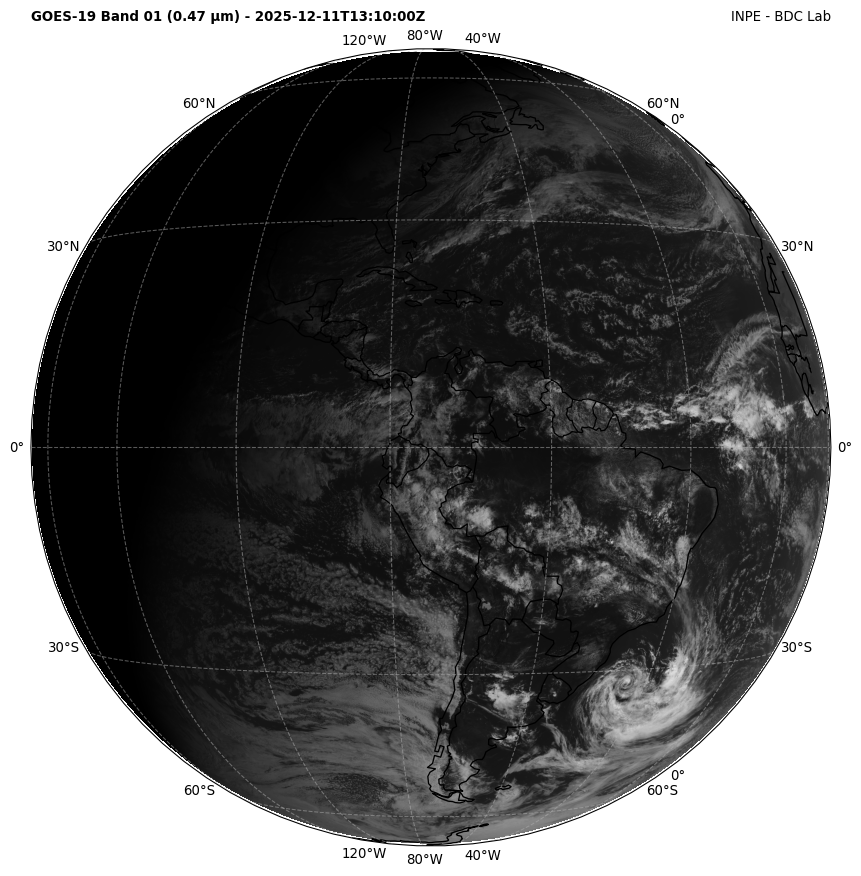

In [17]:
fig, ax = create_map((800, 800), proj=G16_PROJECTION)
# Show image
ax.imshow(image.variables['CMI'], origin='upper', vmin=0.0, vmax=1.0, cmap='gray', extent=G16_FDISK_EXTENT)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=1.0)
# Add references
ax.coastlines(color='black', linewidth=1.0)
# Add title
plt.title('GOES-19 Band 01 (0.47 µm) - {}'.format(item.properties['datetime']), fontweight='bold', fontsize=10, loc='left')
plt.title('INPE - BDC Lab', fontsize=10, loc='right')

## 🗺️ Método para construir uma imagem True Color (RGB)
<hr style="border:1px solid #0077b9;">

### 👩‍🏫 Como construir uma imagem True Color
As imagens True Color são geradas a partir da composição dos canais vermelho (Red), verde (Green) e azul (Blue), de modo a representar a cena de modo próximo à percepção visual humana. No sensor ABI a bordo dos satélites GOES-R, a banda utilizada para o canal vermelho é a B02 (0,64 µm) e para o canal azul a B01 (0,47 µm). Entretanto, o ABI não possui uma banda específica na região do verde visível. Para contornar essa limitação, emprega-se a banda B03 (0,86 µm), situada no infravermelho próximo, como aproximação do canal verde. Essa banda é combinada com informações das bandas visíveis, resultando em uma composição com aparência mais natural.

Passos para geração de uma imagem True Color:
1. Seleção da área de interesse ou da imagem full disk;
2. Remapeamento das matrizes das bandas B02, B01 e B03. A banda B02 tem resolução espacial de 0,5 km, enquanto que as B01 e B03 têm resoluções de 1 km. Portanto, é necessário remapear as matrizes para obter a mesma resolução espacial, garantindo as mesmas dimensões para todas as matrizes;
3. Geração do canal verde sintético (Green_S). Como o ABI não possui uma banda no verde visível, a banda B03 (infravermelho próximo) é utilizada com as demais para construção de uma aproximação:
    `Green_S = (0.45 × RED) + (0.10 × NIR) + (0.45 × BLUE)`;
4. Normalização e correção gamma. As matrizes dos canais RGB são então normalizadas para o intervalo [0,1]. Em seguida, aplica-se a correção gamma com o objetivo de ajustar o brilho e o contraste da composição. A transformação é dada por: `valor_corrigido = valor^(1/γ), sendo comum a utilização de γ = 2,2`.

### 1. Seleção da área de interesse.
Perceba que na imagem acima estamos visualizando a área imageada em sua totalidade (*full-disk*).

De modo a possibilitar uma **visualização detalhada** de uma área específica, vamos definir uma região geográfica (`LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT`) que abrange a América do Sul.

Trata-se de uma lista com 4 valores de longitude e latitude, representando o canto inferior esquerdo e o canto superior direito da região.

In [18]:
# Define the Area of Interest (llx, lly, urx, ury)
LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT = [-88.02, -46.50, -26.22, 12.54]

### 2. Remapeamento.
Uma operação bastante comum no processamento de imagens GOES é o **remapeamento** dos pixels da projeção original de aquisição (*i.e.* projeção geoestacionária) para uma grade espaço-temporal regular, como por exemplo, uma grade no Sistema de Referência Espacial (SRS) EPSG:4326, com coordenadas geográficas.

Com essa operação, temos a opção de trabalhar com a imagem em uma área geográfica menor e em um grade uniforme, considerando a dimensão dos pixels. Isto pode ser uma vantagem, porém, deve ser avaliado de modo específico para o tipo de análise que se deseja realizar. Operações de remapeamento podem gerar distorções de área, por exemplo.

Esta seção apresenta um método capaz de remapear os dados GOES. Definimos uma funcão chamada `remap`, que faz uso da biblioteca GDAL para realizar a transformação de projeção e da resolução espacial da grade.

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Nota:</b> A GDAL é uma biblioteca de código aberto para leitura, escrita e processamento de dados geoespaciais em formatos raster e vetorial, como GeoTIFF e shapefiles. Oferece ferramentas para reprojeção, conversão de formatos, mosaico, corte, cálculo de estatísticas, dentre outras. Escrita em C++, possui uma API que pode ser utilizada em Python.
</div><br>

Em resumo, a função aplica as transformações necessárias, retornando ao final um `Numpy Array` de dimensões (m x n), representando os pixels no novo SRS.

In [19]:
from osgeo import gdal, osr
import numpy as np
from netCDF4 import Dataset

osr.DontUseExceptions()

# Define KM_PER_DEGREE (Earth's circumference/360.0 = ~ 111km)
KM_PER_DEGREE = 40075.16/360.0

def getGeoT(extent, nlines, ncols):
    resx = (extent[2] - extent[0]) / ncols
    resy = (extent[3] - extent[1]) / nlines
    return [extent[0], resx, 0, extent[3] , 0, -resy]

def getScaleOffset(path, var='CMI'):
    nc = Dataset(path + '#mode=bytes', mode='r')
    scale = nc.variables[var].scale_factor
    offset = nc.variables[var].add_offset
    nc.close()
    return scale, offset

def getFillValue(path, var='CMI'):
    nc = Dataset(path + '#mode=bytes', mode='r')
    value = nc.variables[var]._FillValue
    nc.close()
    return value

def getProj(path):
    # Open GOES-16 netCDF file
    nc = Dataset(path + '#mode=bytes', mode='r')
    # Get GOES-R ABI fixed grid projection
    proj = nc['goes_imager_projection']
    # Extract parameters
    h = proj.perspective_point_height
    a = proj.semi_major_axis
    b = proj.semi_minor_axis
    inv = 1.0 / proj.inverse_flattening
    lat0 = proj.latitude_of_projection_origin
    lon0 = proj.longitude_of_projection_origin
    sweep = proj.sweep_angle_axis
    # Build proj4 string
    proj4 = ('+proj=geos +h={} +a={} +b={} +f={} +lat_0={} +lon_0={} +sweep={} +no_defs').format(h, a, b, inv, lat0, lon0, sweep)
    # Create projection object
    proj = osr.SpatialReference()
    proj.ImportFromProj4(proj4)
    # Close GOES-16 netCDF file
    nc.close()
    return proj

def getProjExtent(path):
    nc = Dataset(path + '#mode=bytes', mode='r')
    H = nc['goes_imager_projection'].perspective_point_height
    llx = nc.variables['x_image_bounds'][0] * H
    lly = nc.variables['y_image_bounds'][1] * H
    urx = nc.variables['x_image_bounds'][1] * H
    ury = nc.variables['y_image_bounds'][0] * H
    nc.close()
    return [llx, lly, urx, ury]

def remap(path, extent, resolution, targetPrj, progress=None, var='CMI'):
    # Read scale/offset from file
    scale, offset = getScaleOffset(path, var)

    # GOES spatial reference system
    sourcePrj = getProj(path)

    # Extract GOES projection extent
    goesProjExtent = getProjExtent(path)

    # Fill value
    fillValue = getFillValue(path, var)

    # Read image using netCDF4
    nc = Dataset(path + '#mode=bytes', mode='r')
    data = nc.variables['CMI'][:]
    nc.close()

    # Get memory driver
    memDriver = gdal.GetDriverByName('MEM')

    # Dimensions
    nlines = data.shape[0]
    ncols = data.shape[1]

    # Create GOES data in memory using GDAL
    raw = memDriver.Create('goes', ncols, nlines, 1, gdal.GDT_Float32)

    # Setup projection and geo-transformation
    raw.SetProjection(sourcePrj.ExportToWkt())
    raw.SetGeoTransform(getGeoT(goesProjExtent, nlines, ncols))
    raw.GetRasterBand(1).SetNoDataValue(float(fillValue))
    raw.GetRasterBand(1).Fill(float(fillValue))
    raw.GetRasterBand(1).WriteArray(data)

    # Compute grid dimension
    sizex = int(((extent[2] - extent[0]) * KM_PER_DEGREE)/resolution)
    sizey = int(((extent[3] - extent[1]) * KM_PER_DEGREE)/resolution)

    # Output data type and fill-value
    type = gdal.GDT_Float32

    # Create grid
    grid = memDriver.Create('grid', sizex, sizey, 1, type)
    grid.GetRasterBand(1).SetNoDataValue(float(fillValue))
    grid.GetRasterBand(1).Fill(float(fillValue))

    # Setup projection and geo-transformation
    grid.SetProjection(targetPrj.ExportToWkt())
    grid.SetGeoTransform(getGeoT(extent, grid.RasterYSize, grid.RasterXSize))

    # Perform the projection/resampling
    gdal.ReprojectImage(raw, grid, sourcePrj.ExportToWkt(), targetPrj.ExportToWkt(), \
                        gdal.GRA_NearestNeighbour, options=['NUM_THREADS=ALL_CPUS'], \
                        callback=progress)

    # Result
    data = grid.ReadAsArray()

    # Close all
    raw = None
    grid = None

    return data

Definimos aqui o Spatial Reference System (SRS) EPSG:4326, a partir de uma string proj4.

In [20]:
# Define Lat/Lon WSG84 Spatial Reference System (EPSG:4326)
LAT_LON_WGS84 = osr.SpatialReference()
LAT_LON_WGS84.ImportFromProj4('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
LAT_LON_WGS84

<osgeo.osr.SpatialReference; proxy of <Swig Object of type 'OSRSpatialReferenceShadow *' at 0x719206a44690> >

Em seguida, fazemos o remapeamento para a mesma resolução espacial (2 km) para todas as bandas (B01, B02 e B03), utilizando a área de interesse selecionada (LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT).

In [21]:
b01_remapped = remap(
    path=item.assets['B01'].href,
    extent=LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT,
    resolution=2.0, # <== 2km resolution
    targetPrj=LAT_LON_WGS84
)

In [22]:
b01_remapped.shape

(3286, 3439)

In [23]:
b02_remapped = remap(
    path=item.assets['B02'].href,
    extent=LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT,
    resolution=2.0,
    targetPrj=LAT_LON_WGS84
)

In [24]:
b02_remapped.shape

(3286, 3439)

In [25]:
b03_remapped = remap(
    path=item.assets['B03'].href,
    extent=LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT,
    resolution=2.0,
    targetPrj=LAT_LON_WGS84
)

In [26]:
b03_remapped.shape

(3286, 3439)

### 3. Geração do canal verde
Utilizamos a fórmula seguinte para simular e construir o canal verde:

In [27]:
true_green = (b01_remapped + b02_remapped) / 2 * 0.93 + 0.07 * b03_remapped

Vamos visualizar as 4 matrizes separadas:

(-0.5, 3438.5, 3285.5, -0.5)

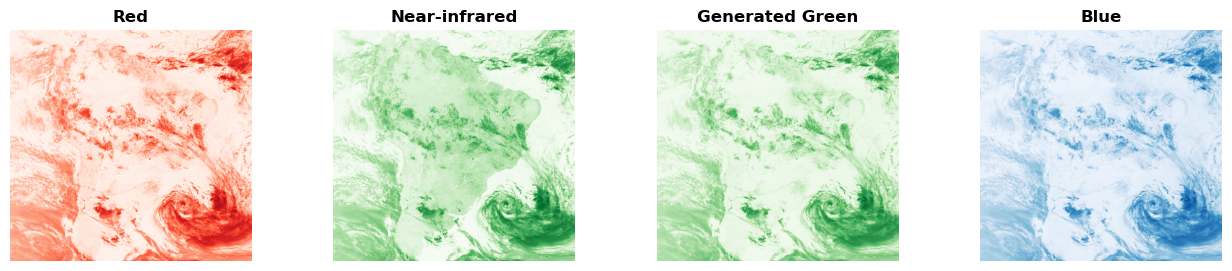

In [28]:
fig, ([ax1, ax2, ax3, ax4]) = plt.subplots(1, 4, figsize=(16, 3))

ax1.imshow(b02_remapped, cmap='Reds', vmax=1, vmin=0)
ax1.set_title('Red', fontweight='bold')
ax1.axis('off')

ax2.imshow(b03_remapped, cmap='Greens', vmax=1, vmin=0)
ax2.set_title('Near-infrared', fontweight='bold')
ax2.axis('off')

ax3.imshow(true_green, cmap='Greens', vmax=1, vmin=0)
ax3.set_title('Generated Green', fontweight='bold')
ax3.axis('off')

ax4.imshow(b01_remapped, cmap='Blues', vmax=1, vmin=0)
ax4.set_title('Blue', fontweight='bold')
ax4.axis('off')

Construção da matriz RGB (True Color) a partir da operação `stack` do NumPy, utilizando 3 bandas remapeadas.

In [29]:
import numpy as np
true_color = np.stack((b02_remapped, b03_remapped, b01_remapped), axis=2)
true_color = np.clip(true_color, 0.0, 1.0)

In [30]:
true_color.shape

(3286, 3439, 3)

Visualizando a imagem composta (B01, B02 e B03). Observamos o tom muito vibrante de verde, o que não faz a imagem realista.

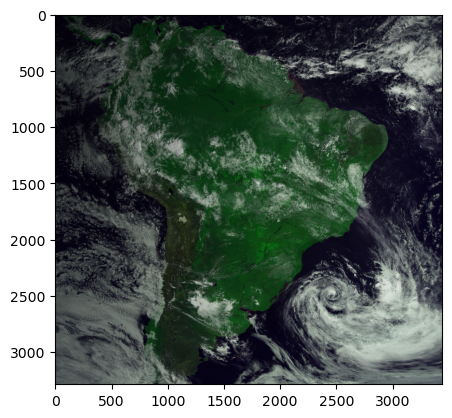

In [31]:
plt.imshow(true_color) # sem o verde simulado

Fazemos novamente o `stack`, desta vez com a cor verde menos vibrante ("verde simulado").

In [32]:
true_color = np.stack((b02_remapped, true_green, b01_remapped), axis=2)
true_color = np.clip(true_color, 0.0, 1.0)

Visualizamos a imagem com cores mais realistas.

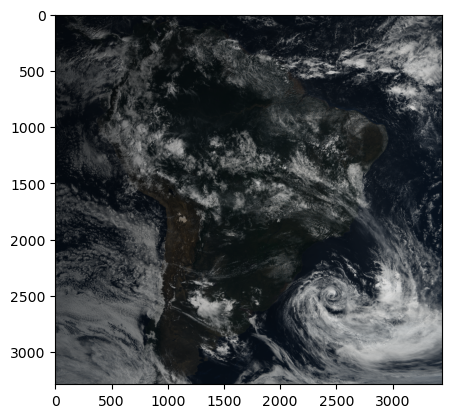

In [33]:
plt.imshow(true_color) # com o verde simulado

### 4. Normalização e correção gamma

Aplica-se a correção gamma com o objetivo de ajustar o brilho e o contraste da composição, seguido da normalização dos valores entre 0 e 1.

In [34]:
γ = 2.2
true_color_gamma = np.clip(true_color ** (1 / γ), 0.0, 1.0)

Imagem true color final.

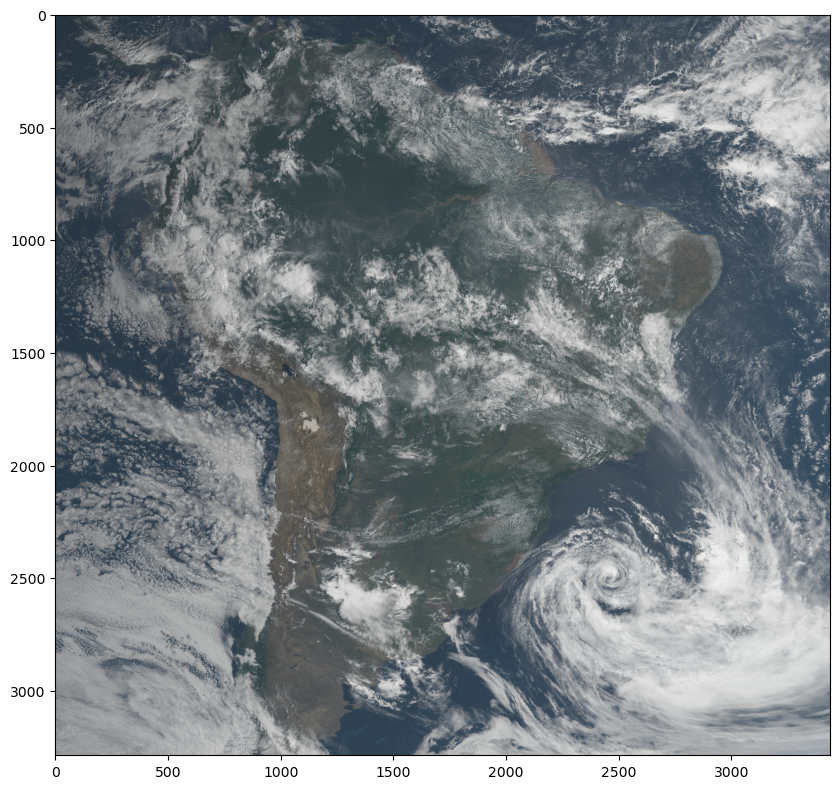

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(true_color_gamma) # com o verde simulado + correção gamma

## Visualização Final

Vamos incluir no mapa elementos como as fronteiras dos países, grade com coordenadas geográficas, títulos, dentre outros.

Finalmente, temos um mapa com uma visualização "true color" e elementos informativos e decorativos. 

Text(1.0, 1.0, 'INPE - BDC Lab')

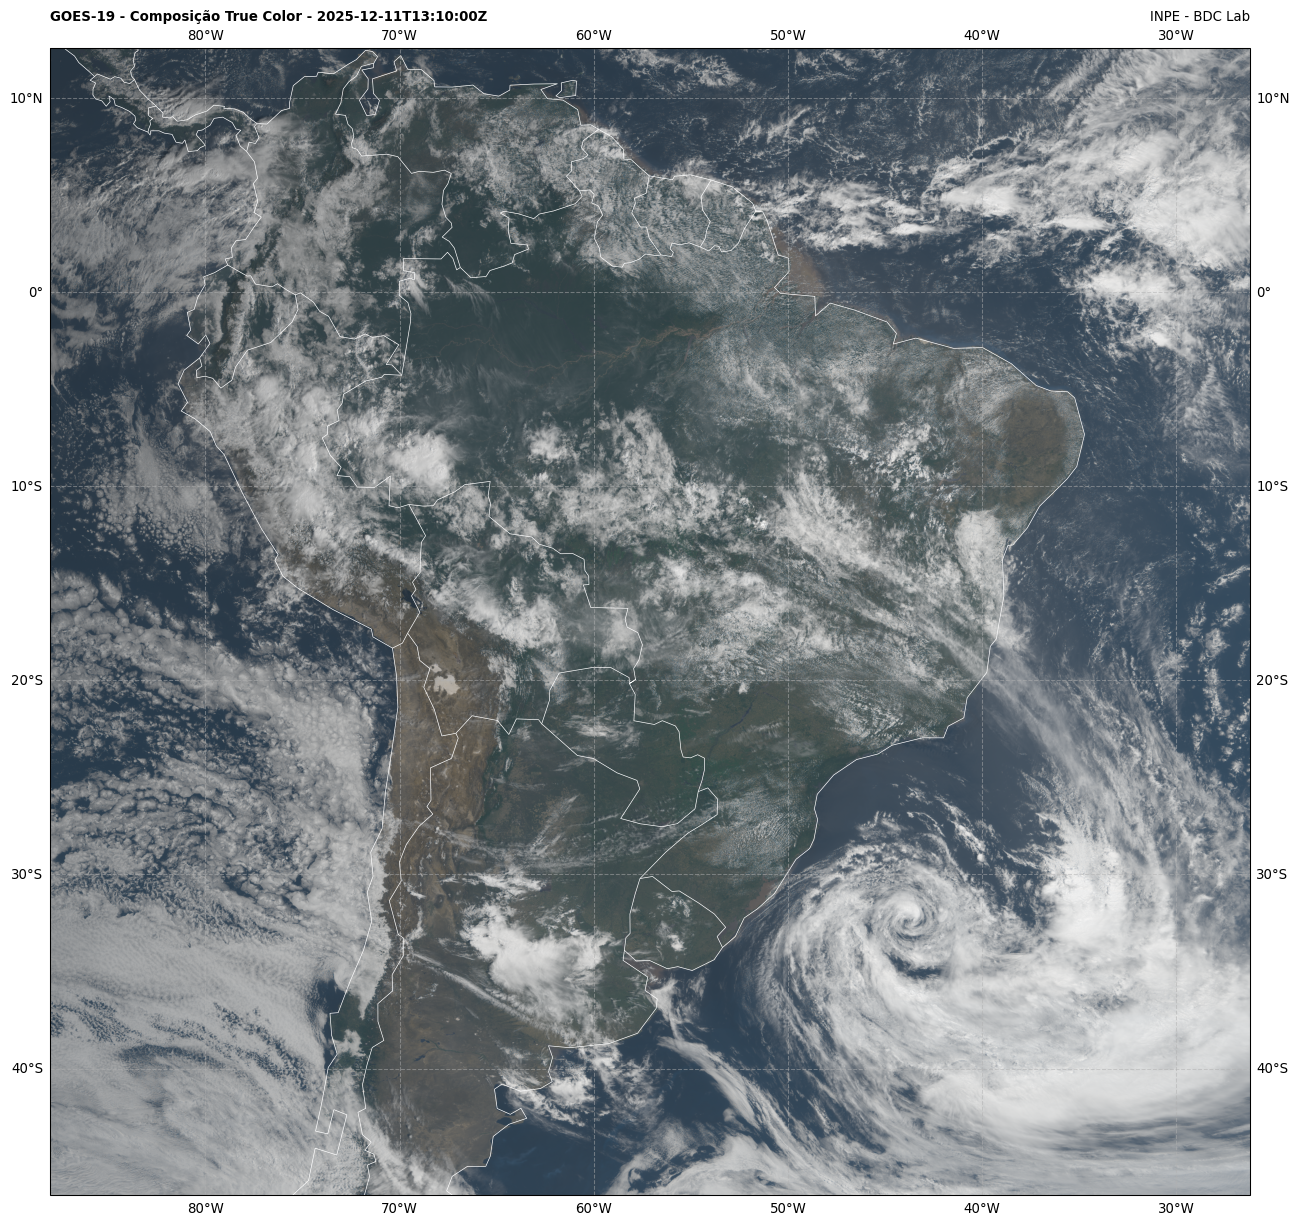

In [36]:
fig, ax = create_map((1200, 1200), proj=ccrs.PlateCarree())

# Show image - com o verde simulado + gamma
ax.imshow(true_color_gamma, origin='upper',
  extent=[
      LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT[0],
      LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT[2],
      LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT[1],
      LAT_LONG_WGS84_SOUTH_AMERICA_EXTENT[3]
  ],
  transform=ccrs.PlateCarree(), rasterized=True
)

# Add references
ax.coastlines(color='white', linewidth=0.5)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)

# Add title
plt.title('GOES-19 - Composição True Color - {}'.format(item.properties['datetime']), fontweight='bold', fontsize=10, loc='left')
plt.title('INPE - BDC Lab', fontsize=10, loc='right')